In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa

  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Obtaining dependency information for pooch>=1.0 from https://files.pythonhosted.org/packages/1a/a5/5174dac3957ac412e80a00f30b6507031fcab7000afc9ea0ac413bddcff2/pooch-1.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonhosted.org/packages/d0/79/c93daceac24cd6830333d9f3d04716115240ef3be4e8d8ece511afbcf417/soxr-0

In [ ]:
!pip install keras tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/de/ea/90267db2c02fb61f4d03b9645c7446d3cbca6d5c08522e889535c88edfcd/tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-macos==2.14.0 from https://files.pythonhosted.org/packages/d3/4b/ae9037ea22ba94eb2cf267e991384c3444f3e6142fa49923352b4ab73e14/tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.9 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency info

  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 2.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 1.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1

In [ ]:
import numpy as np
import json
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import (
    Reshape, Conv2D, MaxPooling2D, LSTM, Dense, BatchNormalization, Dropout
)
import tensorflow.keras as keras
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Reshape, LSTM, Dense, Flatten
import visualkeras
from sklearn.metrics import accuracy_score, confusion_matrix
from seaborn import heatmap

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data['mfcc'])
    Y = np.array(data['labels'])
    mappings = data['mappings']
    print('Data Loaded Successfully!')

    return X, Y, mappings

In [ ]:
def prepare_dataset(validation_size, test_size):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

In [ ]:
DATA_PATH = './Data/data2.json'
X, Y, mappings = load_data(DATA_PATH) # loading data to X and Y

Data Loaded Successfully!


In [ ]:
X[1]

array([[-125.19251251,   52.42250061,    3.39848948, ...,   -0.46635944,
           8.29506207,    4.44266844],
       [-105.78495026,   59.81277466,  -14.81919479, ...,    4.15743828,
          17.92702484,   19.41639328],
       [-128.85920715,   66.21810913,  -27.50498962, ...,    6.79812098,
          16.9738884 ,   14.7509861 ],
       ...,
       [ -89.07861328,   38.95236969,   -0.92248428, ...,   -9.00198174,
          -8.68752289,    4.14988041],
       [ -88.86136627,   35.22490311,   -0.56864631, ...,  -13.09553909,
         -10.26384068,    2.50048947],
       [ -95.36901855,   38.03978729,  -18.89785767, ...,  -13.7063694 ,
         -16.68349075,    3.16128635]])

In [ ]:
len(X)

9986

In [ ]:
Y

array([ 0,  0,  0, ..., 10, 10, 10])

In [ ]:
temp = Y

In [ ]:
temp

array([ 0,  0,  0, ..., 10, 10, 10])

In [ ]:
pd.Series(temp).value_counts()

3     1000
4     1000
7     1000
9     1000
10    1000
0      999
5      999
6      999
8      999
1      990
Name: count, dtype: int64

In [ ]:
# Define the dictionary
d = {3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9}
# Create an empty NumPy array with shape (9,)
my_array = temp
(pd.Series(my_array)).map(d)

# Map the dictionary to the NumPy array
for i, num in enumerate(my_array):
    if  num!= 0 and num != 1 and num != 2:
        my_array[i]=num-1

print(my_array)


[0 0 0 ... 9 9 9]


In [ ]:
pd.Series(my_array).value_counts()

2    1000
3    1000
6    1000
8    1000
9    1000
0     999
4     999
5     999
7     999
1     990
Name: count, dtype: int64

In [ ]:
Y = my_array
Y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scaler(X):
  sc = MinMaxScaler(feature_range = (0, 1))

  scaled_list = []
  for i, arr in enumerate(X):
    training_set_scaled = sc.fit_transform(X[i])
    scaled_list.append(training_set_scaled)
  return scaled_list

In [ ]:
X = np.array(scaler(X))

In [ ]:
X[1]

array([[0.42200731, 0.27853925, 0.74929858, ..., 0.45943807, 0.60531611,
        0.67772832],
       [0.53596041, 0.33625282, 0.57564409, ..., 0.53986148, 0.80029639,
        1.        ],
       [0.40047801, 0.3862746 , 0.45472065, ..., 0.58579185, 0.781002  ,
        0.89958887],
       ...,
       [0.63405305, 0.17334569, 0.70811023, ..., 0.31097484, 0.26153682,
        0.6714268 ],
       [0.63532863, 0.14423643, 0.71148308, ..., 0.23977409, 0.22962735,
        0.63592781],
       [0.59711841, 0.16621897, 0.53676549, ..., 0.22914969, 0.09967406,
        0.6501498 ]])

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(0.25, 0.2)
print(X_train.shape)
print(y_train.shape)

(5991, 130, 23, 1)
(5991,)


In [ ]:
X_test.shape

(1998, 130, 23, 1)

In [ ]:
X_train

array([[[[0.63001903],
         [0.58037036],
         [0.44065701],
         ...,
         [0.51085097],
         [0.41232408],
         [0.43962221]],

        [[0.70455524],
         [0.49072284],
         [0.4725642 ],
         ...,
         [0.43681434],
         [0.37618997],
         [0.28036798]],

        [[0.68203812],
         [0.48846118],
         [0.64026725],
         ...,
         [0.48697636],
         [0.30742758],
         [0.        ]],

        ...,

        [[0.62927724],
         [0.78063156],
         [0.39964795],
         ...,
         [0.33578407],
         [0.23558272],
         [0.49546268]],

        [[0.58390531],
         [0.83781838],
         [0.49647405],
         ...,
         [0.0949899 ],
         [0.00147189],
         [0.45305795]],

        [[0.37494349],
         [0.93234671],
         [0.57871268],
         ...,
         [0.48495327],
         [0.36267513],
         [0.22456872]]],


       [[[0.36716575],
         [0.60356972],
         [0.52

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(130, 23, 1)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(30, (3, 3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(60, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides = (2, 2), padding = 'same'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(60, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((4, 4), strides = (2, 2), padding = 'same'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

In [ ]:
output_shape = model.output_shape
output_shape

(None, 15, 2, 60)

In [ ]:
model.add(Reshape(target_shape = (output_shape[1], int(output_shape[2] * output_shape[3]))))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30))

In [ ]:
model.add(Dense(10, activation='softmax'))

In [ ]:
# model = build_model(input_shape)
# model = build_model((X_train.shape[1], X_train.shape[2]))

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(optimizer = optimizer,
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 21, 30)       300       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 11, 30)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 64, 11, 30)        0         
                                                                 
 batch_normalization_9 (Bat  (None, 64, 11, 30)        120       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 9, 60)         16260     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 31, 5, 60)        

In [ ]:
import pandas as pd
pd.Series(y_train).value_counts()

8    622
1    610
6    603
9    602
0    597
3    597
2    597
4    596
5    587
7    580
Name: count, dtype: int64

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 250)

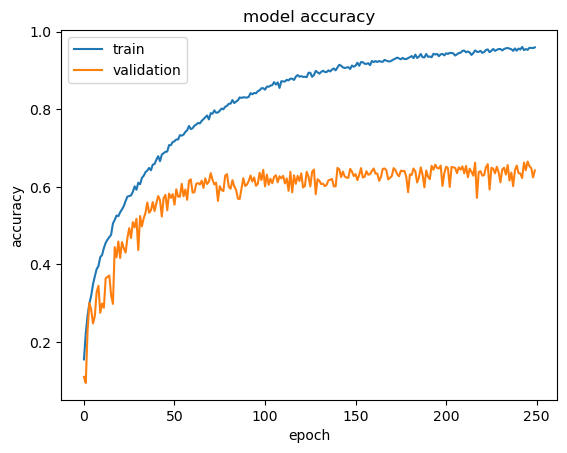

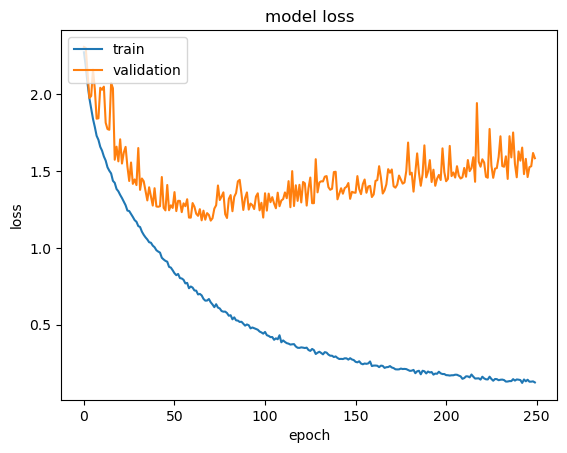

In [ ]:
plot_history(history)

In [ ]:
model.save('./dl_model.h5')

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predictions = model.predict(X_test).tolist()

63/63 [==============================] - 15s 10ms/step


In [ ]:
predictions

[[0.0022014996502548456,
  0.0006842080620117486,
  0.00031978049082681537,
  6.471739470725879e-05,
  2.1027339244028553e-05,
  6.97519863024354e-05,
  8.803630771581084e-05,
  0.0017605606699362397,
  4.6015044063096866e-05,
  0.9947444200515747],
 [0.00014459154044743627,
  2.226342257927172e-05,
  1.8381737390882336e-05,
  4.085987529833801e-05,
  9.63986440183362e-06,
  1.9901997347915312e-06,
  0.0002741490607149899,
  0.9993744492530823,
  7.463740621460602e-05,
  3.914386252290569e-05],
 [0.0004144818230997771,
  0.005775619763880968,
  5.23097587574739e-05,
  0.00043203012319281697,
  0.009297278709709644,
  0.0013090610736981034,
  0.0003523582417983562,
  3.3700940548442304e-05,
  0.0097348028793931,
  0.9725983142852783],
 [0.00460148835554719,
  3.461581582087092e-05,
  0.003592871828004718,
  0.00011769864795496687,
  4.9995647714240476e-05,
  0.006461543962359428,
  0.9626203775405884,
  0.00011356476898072287,
  0.022328928112983704,
  7.89843252277933e-05],
 [5.2064409

In [ ]:
predicted_classes = [np.array(xi).argmax() for xi in predictions]
test_accuracy = accuracy_score(predicted_classes, y_test)
test_accuracy * 100

64.21421421421421

In [ ]:
predicted_classes = [mappings[np.array(xi).argmax()] for xi in predictions]
y_test_classes = [mappings[di] for di in y_test]
#     plot_confusion_matrix(Y_test_classes, predicted_classes, mappings)

In [ ]:
y_test_classes

['/content/drive/MyDrive/GTZAN/genres_original/rock',
 '/content/drive/MyDrive/GTZAN/genres_original/reggae',
 '/content/drive/MyDrive/GTZAN/genres_original/hiphop',
 '/content/drive/MyDrive/GTZAN/genres_original/hiphop',
 '/content/drive/MyDrive/GTZAN/genres_original/disco',
 '/content/drive/MyDrive/GTZAN/genres_original/rock',
 '/content/drive/MyDrive/GTZAN/genres_original/reggae',
 '/content/drive/MyDrive/GTZAN/genres_original/classical',
 '/content/drive/MyDrive/GTZAN/genres_original/metal',
 '/content/drive/MyDrive/GTZAN/genres_original/disco',
 '/content/drive/MyDrive/GTZAN/genres_original/jazz/.ipynb_checkpoints',
 '/content/drive/MyDrive/GTZAN/genres_original/country',
 '/content/drive/MyDrive/GTZAN/genres_original/blues',
 '/content/drive/MyDrive/GTZAN/genres_original/rock',
 '/content/drive/MyDrive/GTZAN/genres_original/jazz',
 '/content/drive/MyDrive/GTZAN/genres_original/rock',
 '/content/drive/MyDrive/GTZAN/genres_original/jazz',
 '/content/drive/MyDrive/GTZAN/genres_origi

In [ ]:
st_classes, pred_classes = [], []
def cleaner(y_test_classes):
    lst = []
    for stg in y_test_classes:
        x = stg.rfind('/')
        if stg[x+1] == '.':
            xt = stg.rfind('/', stg.rfind('/') - 1)
            lst.append(stg[45:xt])

        else:
            lst.append(stg[x+1:])
    return lst
st_classes = cleaner(y_test_classes)
pred_classes = cleaner(predicted_classes)
pred_classes

['rock',
 'reggae',
 'rock',
 'country',
 'hiphop',
 'rock',
 'country',
 'hiphop',
 'metal',
 'disco',
 'classical',
 'rock',
 'blues',
 'rock',
 'jazz',
 'classical',
 'jazz',
 'country',
 'classical',
 'metal',
 'rock',
 'classical',
 'country',
 'hiphop',
 'metal',
 'country',
 'jazz',
 'hiphop',
 'blues',
 'blues',
 'metal',
 'metal',
 'hiphop',
 'classical',
 'jazz',
 'rock',
 'classical',
 'disco',
 'blues',
 'classical',
 'hiphop',
 'metal',
 'jazz',
 'disco',
 'jazz',
 'hiphop',
 'jazz',
 'hiphop',
 'jazz',
 'classical',
 'hiphop',
 'hiphop',
 'blues',
 'hiphop',
 'metal',
 'metal',
 'blues',
 'classical',
 'country',
 'blues',
 'metal',
 'hiphop',
 'country',
 'classical',
 'hiphop',
 'hiphop',
 'jazz',
 'jazz',
 'hiphop',
 'blues',
 'disco',
 'blues',
 'classical',
 'country',
 'rock',
 'jazz',
 'rock',
 'hiphop',
 'metal',
 'blues',
 'jazz',
 'disco',
 'hiphop',
 'metal',
 'reggae',
 'blues',
 'classical',
 'country',
 'classical',
 'hiphop',
 'hiphop',
 'hiphop',
 'jazz',


In [ ]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)

    plt.figure(figsize=(12.8,6))
    heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

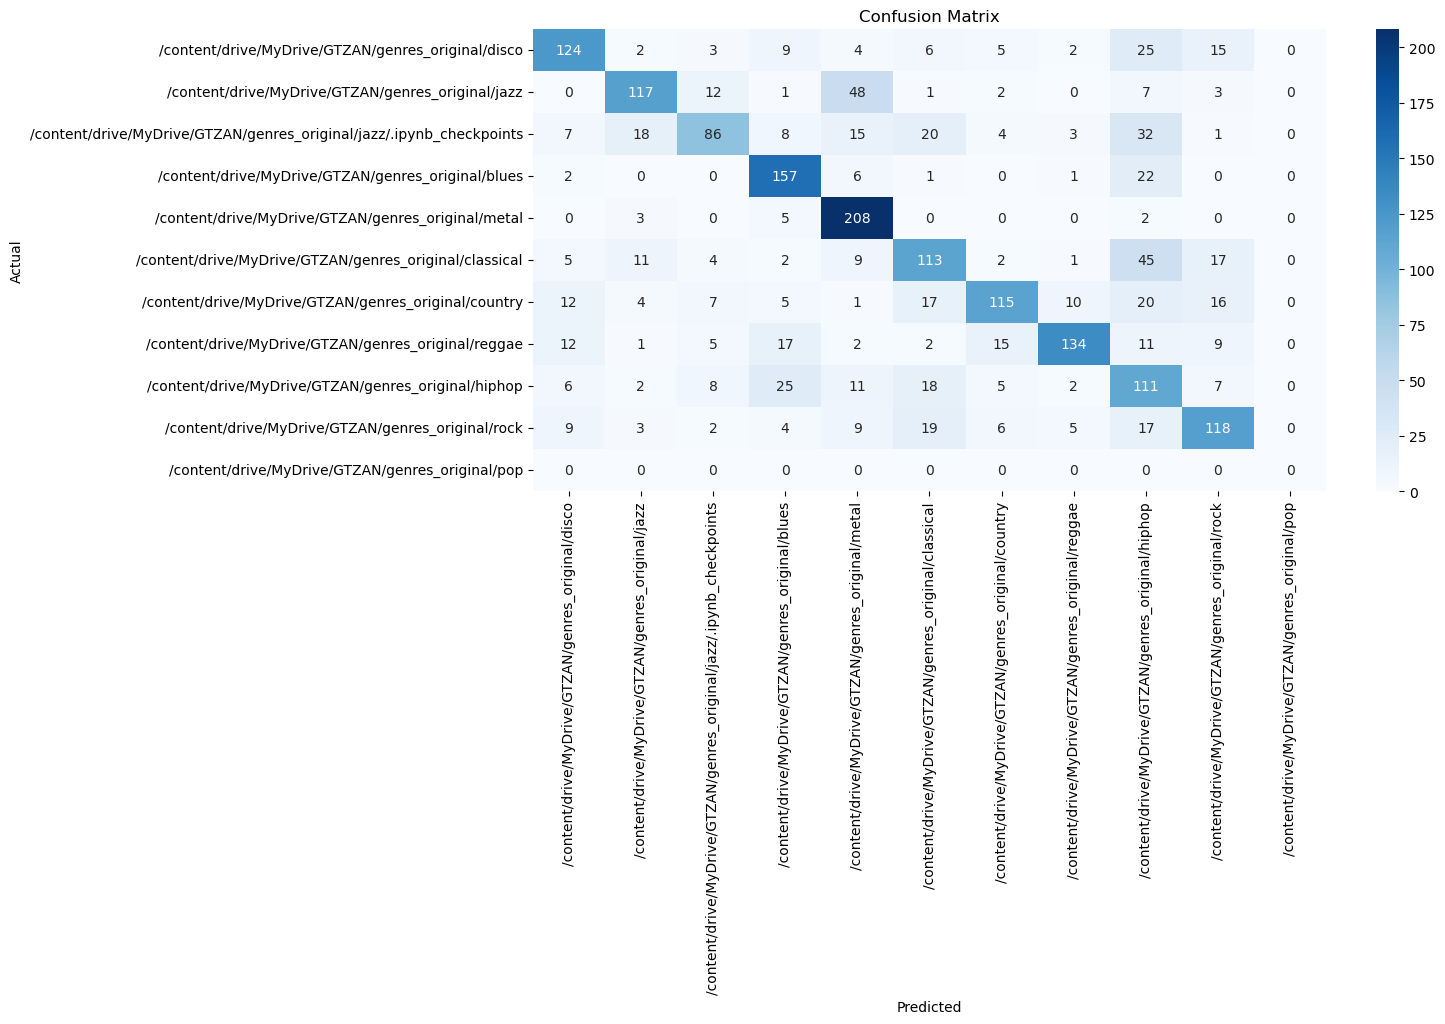

In [ ]:
plot_confusion_matrix(y_test_classes, predicted_classes, mappings)